Las secciones `1`, `2`, `3`, `4`, y `5`, son sólo un resumen de las sesiones anteriores, pero usando las funciones de la libreta que contiene todas las funciones del curso.

## 1. Cargar modelo de lenguaje a la notebook

In [1]:
def descarga_modelo_lenguaje(nombre_modelo):
  import subprocess
  ! pip install -U spacy
  importa = '! python -m spacy download ' + str(nombre_modelo)
  subprocess.call(importa, shell=True)
  return 

In [2]:
descarga_modelo_lenguaje('es_dep_news_trf')

# 2. Importar el modelo en la notebook nueva

In [3]:
def importa_modelo(nombre_modelo):
  import subprocess
  subprocess.call('import ' + str(nombre_modelo), shell=True)
  import spacy
  nlp = spacy.load(str(nombre_modelo))
  return nlp 

In [4]:
nlp = importa_modelo('es_dep_news_trf')

# 3. Cargar datos en la notebook

In [5]:
def cargar_datos(ruta_con_datos, sep):
  import pandas as pd
  if sep == True:
    datos = pd.read_csv(ruta_con_datos, sep="\t")
  else:
    datos = pd.read_csv(ruta_con_datos)
  return datos

In [6]:
ruta = '/datos_deteccion_sexismo.tsv'
datos = cargar_datos(ruta, True)
datos

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
...,...,...,...,...,...,...,...
6972,EXIST2021,6973,twitter,es,"Estamos igual sin pareja, pero puedes besar a ...",non-sexist,non-sexist
6973,EXIST2021,6974,twitter,es,2020 hijo de re mil putas,non-sexist,non-sexist
6974,EXIST2021,6975,twitter,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...,non-sexist,non-sexist
6975,EXIST2021,6976,twitter,es,@safetyaitana mi madre dice q va fea y i agree,sexist,objectification


# 4. Eliminar columnas en mi variable `datos`

In [7]:
def elimina_columna_en_pandas(variable_pandas, columnas_a_eliminar):
  variable_pandas.drop(columnas_a_eliminar, axis=1, inplace=True)
  return variable_pandas

In [8]:
datos_nuevos = elimina_columna_en_pandas(datos, ['test_case', 'id', 'source', 'task1', 'task2'])

In [9]:
datos_nuevos

,language,text
0,en,"She calls herself ""anti-feminazi"" how about sh..."
1,en,"Now, back to these women, the brave and the be..."
2,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve..."
3,en,@AurelieGuiboud Incredible! Beautiful!But I l...
4,en,i find it extremely hard to believe that kelly...
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


# 5. Borrar todas las filas que tengan el valor `en` dentro de la columna `language`

In [10]:
datos = datos[datos['language'] != 'en']
datos

,language,text
3436,es,Nadie te va a tratar tan bien como un hombre q...
3437,es,"@lindagisela74 Que rica putita obediente, afor..."
3438,es,@BicireporteraDF Yo lo hice a los 18 años por ...
3439,es,las cosas q sueño son indicios de que yo enrea...
3440,es,"Pero a la niña le gustó desde que lo vió, así ..."
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


Definimos una nueva variable, `datos_nuevos`, con sólo 100 muestras de la variable `datos`.

Esto sólo para poder ejecutar el siguiente código rápidamente en la sesión.

In [11]:
datos_nuevos = datos[0:100]

In [12]:
# reset_index enumera los tuits en la variable datos_nuevos
# de 0 a 99, pues antes tenían sus índices originales.
datos_nuevos = datos_nuevos.reset_index()

In [13]:
datos_nuevos = elimina_columna_en_pandas(datos_nuevos, ['index', 'language'])
datos_nuevos

,text
0,Nadie te va a tratar tan bien como un hombre q...
1,"@lindagisela74 Que rica putita obediente, afor..."
2,@BicireporteraDF Yo lo hice a los 18 años por ...
3,las cosas q sueño son indicios de que yo enrea...
4,"Pero a la niña le gustó desde que lo vió, así ..."
...,...
95,la reconstrucción de personajes masculinos a f...
96,Miranda Cosgrove paso de ser una perra mala a ...
97,La mayoría de las veces juzgamos a los hombres...
98,DE MÉXICO PARA EL MUNDO #RESPETO #YoSiTeCreo h...


In [ ]:
# Revisamos sólo un tuit de la variable datos_nuevos en la columna text, índice 10.
datos_nuevos['text'][10]

'Perdonar lo no sólo es posible, es absolutamente necesario. Estoy harta de las boludas que acusan de todos los males de la humanidad a los hombres. Muerte al feminismo'

In [14]:
def obtiene_pos(datos, columna, parametro):
  tokens_finales = []
  for texto in datos[str(columna)]:
    doc = nlp(texto)
    for token in doc:
      if token.pos_ == str(parametro):
        tokens_finales.append(token.text)
  return tokens_finales

In [156]:
tokens_sustantivos = obtiene_pos(datos_nuevos, 'text', 'NOUN')
tokens_adjetivos = obtiene_pos(datos_nuevos, 'text', 'ADJ')
tokens_verbos = obtiene_pos(datos_nuevos, 'text', 'VERB')
tokens_aux = obtiene_pos(datos_nuevos, 'text', 'AUX')
tokens_det = obtiene_pos(datos_nuevos, 'text', 'DET')
tokens_pron = obtiene_pos(datos_nuevos, 'text', 'PRON')

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


# Visualización de datos

Para la siguiente sección utilizaremos las librerías `matplotlib` y `WordCloud`. 

La primera permite realizar gráficas de diversos tipos. La segunda genera nubes de palabras de manera muy sencilla.

## Nubes de palabras

In [17]:
# Recordemos siempre instalar las librerías antes de usarlas. De lo contrario no 
# funcionará el código que dependa de dicha librería. El comando para instalar
# WordCloud es el siguiente:
! pip install WordCloud

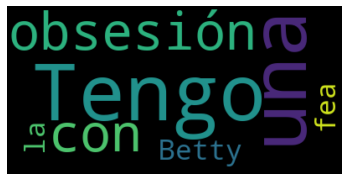

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definimos una variable con sólo un tuit.
texto = datos_nuevos['text'][17]

# Definimos la variable nube que toma al tuit guardado en la variable texto.
# Con esta simple línea podemos generar la nube de palabras.
nube = WordCloud().generate(texto)

# Estas líneas son sólo para mostrar la nube en la libreta. No hay necesidad
# de modificarlas.
plt.imshow(nube, interpolation='bilinear')
plt.axis("off")
plt.show()

Revisemos los tokens etiquetados como verbos, y guardados en la variable `tokens_verbos`.

In [ ]:
tokens_verbos

Ahora juntaremos todos los tokens anteriores en un string muy largo. Esto es porque `WordCloud` nos pide que le pasemos un string y no una lista. 

El siguiente bloque de código realiza esta tarea, y para modificarlo sólo habría que cambiar la variable `tokens_verbos` por otra variable de tipo lista que contenga tokens.

In [21]:
tokens_nube = ' '.join(tokens_verbos)

In [22]:
tokens_nube 

'tratar quiere meter tener hice veras sueño tengo gustó vió dije ver gustan rodeaba vi fijo Faltar Dice necesita recurrir METER CABELO CABE CABELA HACER Sigues lloriqueando des diciendo empodera rodean decir hablen Perdonar acusan tengo quitar sentarme estudiar parece pintarme fregar limpiar mirar hacer pasan luchan jugar pegan violar montar ver bailando.son quieren tener Conozco quería tener tuvo asesinar Tenemos acabar Tengo vais pagáis merece parece sexualicen sé tienen Tengo dejar tratar Dicen buscar preguntas encontrar dicen buscan sirven entender existe tiene dejar querer separarse decir pienso quererlas quieran quieran SALISTE PARECES MUERO AMO AMO explicas creen pegar creen toca viola mata conoces sufres ayudarte diciéndole Vaya seas sigue riéndose dicen vanaglorian da utilice incluyendo mira QUIERO dicho empecina hacer quiero comprar conformarse existe evado desmiembra envuelve Busco viva follar olvidado takes apoyar necesitan busco quiera estar da lave guste follar traduce so

Veamos que en la variable `tokens_nube` están todos los tokens de `tokens_verbos`, pero pegados en un string muy largo.

Ahora crearemos una nueva nube de palabras, pero con parámetros específicos.

- `background_color` nos permite cambiar el color de fondo de las nubes.
- `max_words` define el número máximo de palabras que se mostrarán en la nube.
- `color_map` cambia la paleta de colores de la nube. Las paletas disponibles se muestan en la sección **Mapas de colores** de esta libreta.

- `plt.figure(figsize=)` cambia el tamaño de la nube generada.
- `plt.title()` permite ponerle un título a la nube generada. Esta línea es opcional.

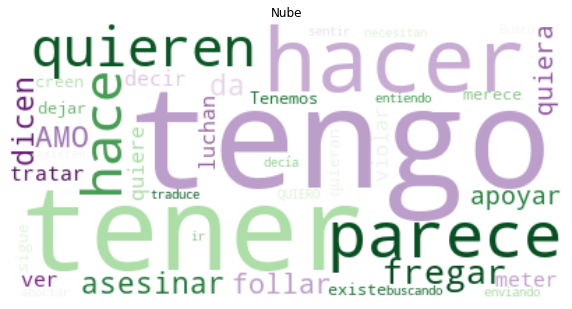

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nube = WordCloud(background_color="white", max_words=40, colormap='PRGn').generate(tokens_nube)

plt.figure(figsize=(10,8))
plt.imshow(nube, interpolation='bilinear')
plt.axis("off")
plt.title("Nube") # Pone un título a la imagen generada.
plt.show()

En la siguiente celda definiremos la función `nube_con_forma`, la cual toma:

- `ruta_imagen`: la ruta de Drive en la que tenemos guardada una imagen en formato `.jpg`.
- `color_fondo`: el color que tendrá el fondo de la nube.
- `ancho_figura`: determina el grosor de la figura que contendrá a las palabras.
- `tamano`: el tamaño de la imagen a generar. Se debe introducir de la forma `(largo, ancho)`.

In [58]:
def nube_con_forma(ruta_imagen, color_fondo, ancho_figura, tamano):
  from wordcloud import WordCloud
  import matplotlib.pyplot as plt
  from PIL import Image
  from wordcloud import ImageColorGenerator
  import numpy as np

  # Carga la forma de la imagen especificada dentro de open()
  forma = np.array(Image.open(str(ruta_imagen)))

  # Obtiene los colores de la imagen introducida.
  colores = ImageColorGenerator(forma)

  # Crea la variable nube
  nube = WordCloud(scale=3,
                    mask=forma,
                    background_color=str(color_fondo),
                    color_func=colores,
                    contour_color='black',
                    contour_width=int(ancho_figura)).generate_from_text(tokens_nube)

  # Despliega la nube con forma.
  plt.figure(figsize=tamano)
  plt.imshow(nube)
  plt.axis('off')
  plt.show()
  return

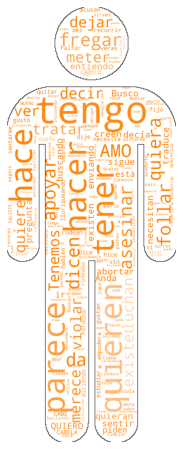

In [60]:
ruta_imagen = 'man.jpg'
color_fondo = 'white'
ancho_figura = 1 
tamano = (10, 8)

nube_con_forma(ruta_imagen, color_fondo, ancho_figura, tamano)

### Mapas de colores

En esta sección se define una función, `cmap_plot`, que permite visualizar todas las paletas de colores disponibles. 

In [ ]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

A continuación se muestran los colores disponibles en matplotlib. Si deseamos utilizar alguno, sólo debemos copiar su string asociado.

Por ejemplo, si quieremos un gráfico con los colores en `PRGn`, debemos copiar `PRGn` en la función del gráfico.

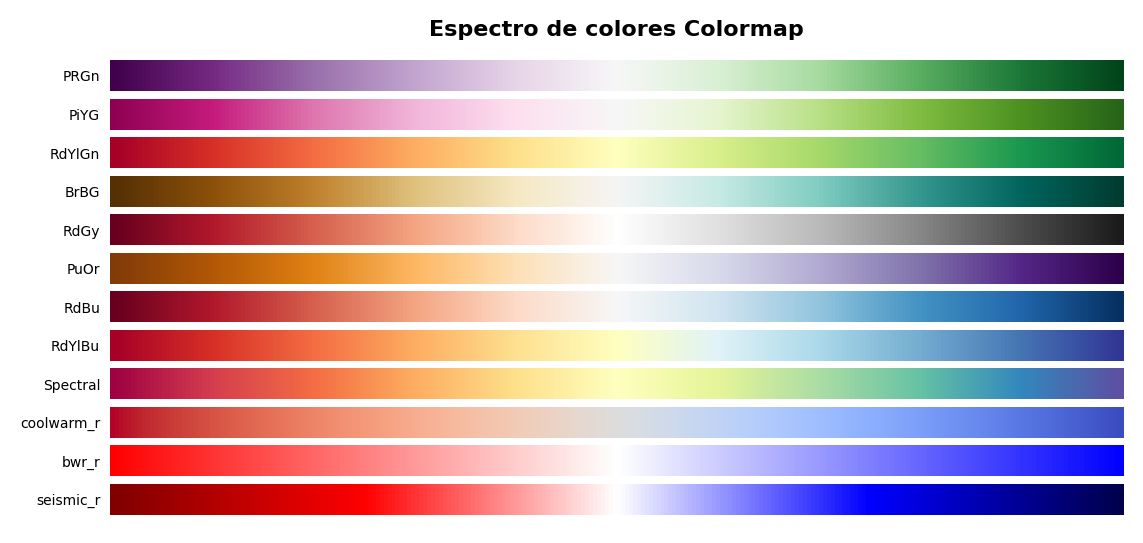

In [194]:
diverge_cmap = ('PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r')
cmap_plot(diverge_cmap, 'Espectro de colores')

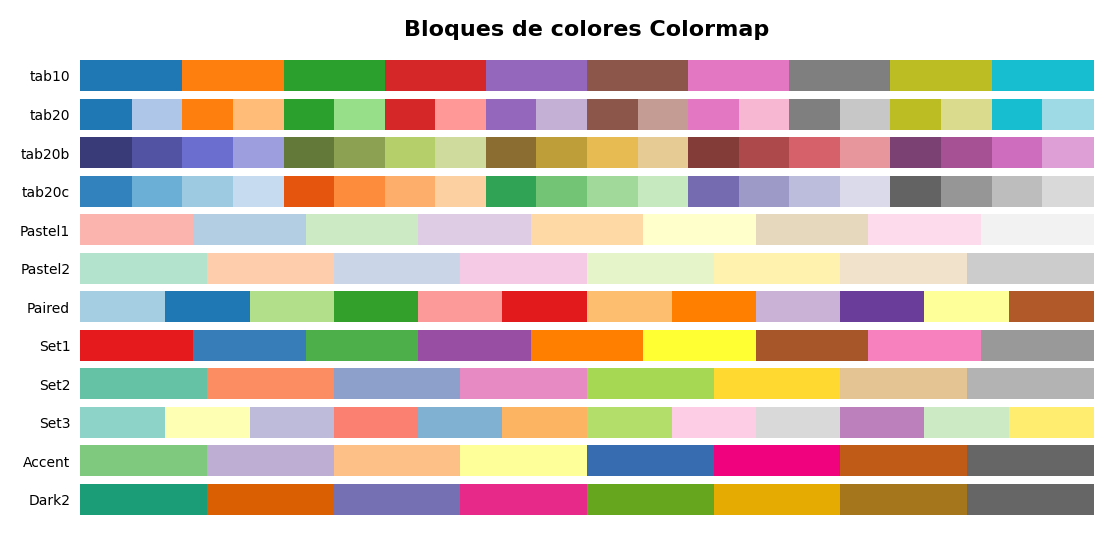

In [195]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired',
         'Set1', 'Set2', 'Set3', 'Accent', 'Dark2' )

cmap_plot(qualitative_cmap, 'Bloques de colores')

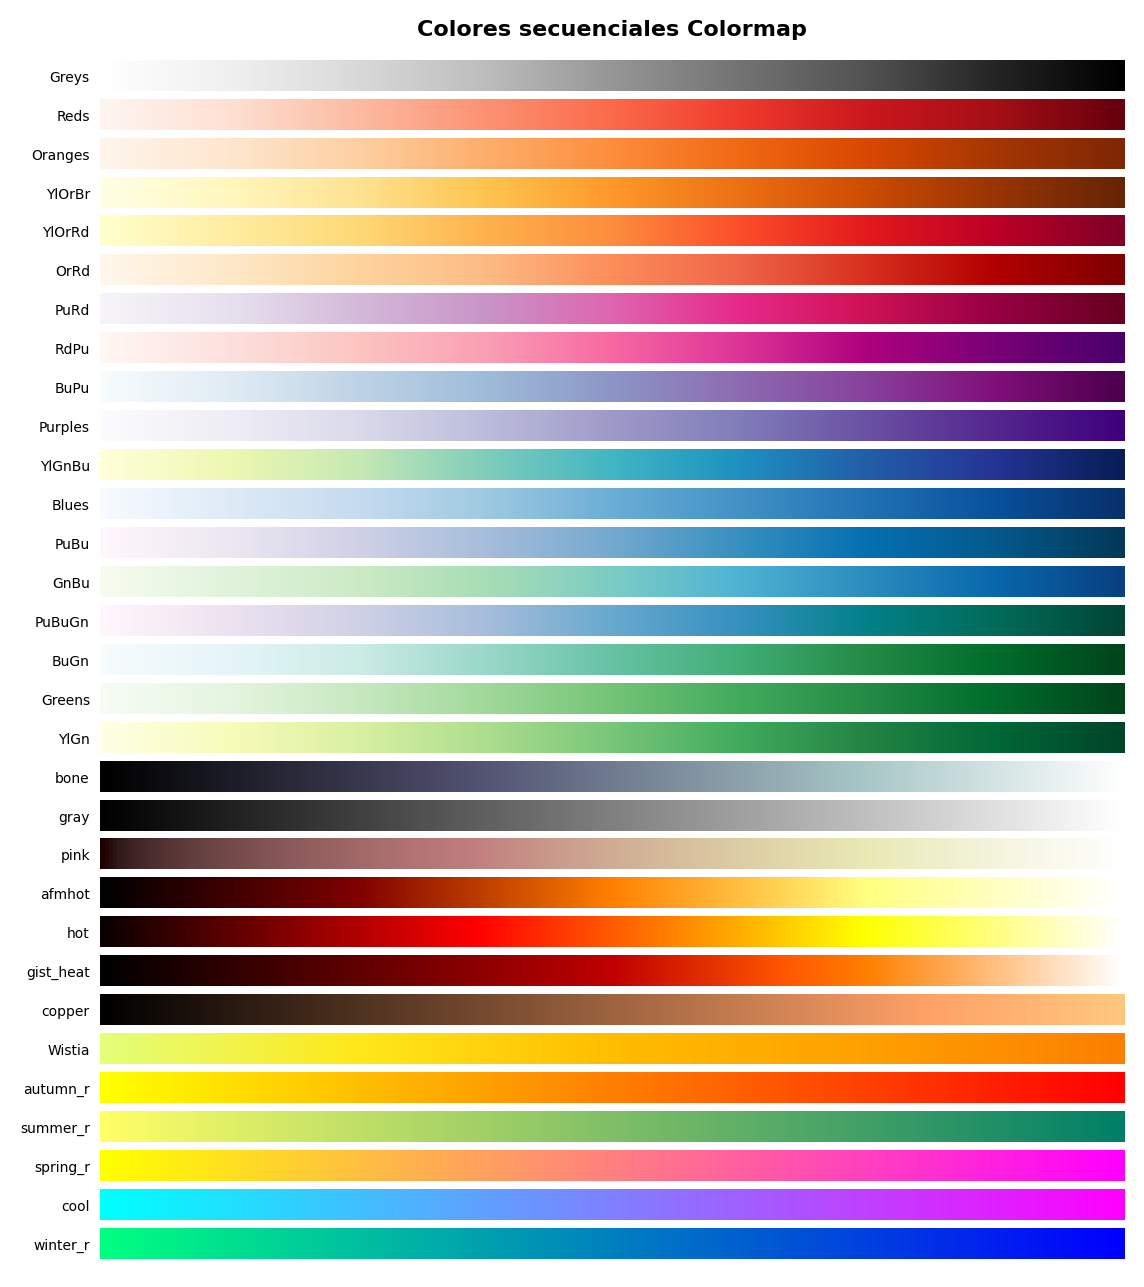

In [196]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',
         'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Colores secuenciales')

## Gráficas

Con ayuda de la librería `matplotlib`, generaremos varias gráficas con la información de nuestro conjunto de datos de detección de sexismo.

In [ ]:
# Carguemos todo lo necesario para los siguientes bloques de código.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  
import seaborn as sns 

### Gráficas de barras

Primero crearemos una gráfica de barras con datos inventados. 

Primero definimos dentro de una lista los datos del eje vertical; luego, en otra lista, los del eje horizontal.

La línea `4` de código crea la gráfica de barras con la ayuda de la función `bar`, que toma dos listas.

La línea `5` pone un nombre al eje horizontal de la gráfica.

La línea `6` pone un nombre al eje vertical de la gráfica.

La línea `7` pone un título a la gráfica.

La línea `9` despliega la gráfica.

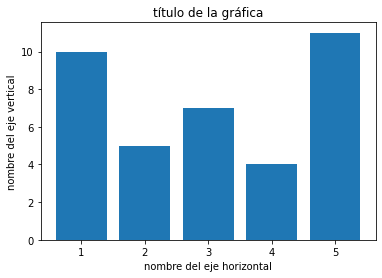

In [67]:
datos_eje_horizontal = [1, 2, 3, 4, 5]
datos_eje_vertical = [10, 5, 7, 4, 11]

plt.bar(datos_eje_horizontal, datos_eje_vertical)
plt.xlabel("nombre del eje horizontal")
plt.ylabel("nombre del eje vertical")
plt.title("título de la gráfica")

plt.show()

### Cómo generar una imagen con una gráfica, y una imagen con seis gráficas.



En el siguiente bloque crearemos `6` gráficas dentro de una imagen. Este número se especifica dentro de la función `subplots`. 

El primer número indica cuántas filas tendrá la imagen, y el segundo número el número de columnas.

En este caso desplegaremos `2` filas y `3` columnas. 

El parámetro `figsize` permite ajustar el tamaño de la imagen que queremos generar. Se debe introducir de la forma `(largo, ancho)` de la imagen.

`plt.show()` muestra a la imagen generada en la primera línea del bloque.

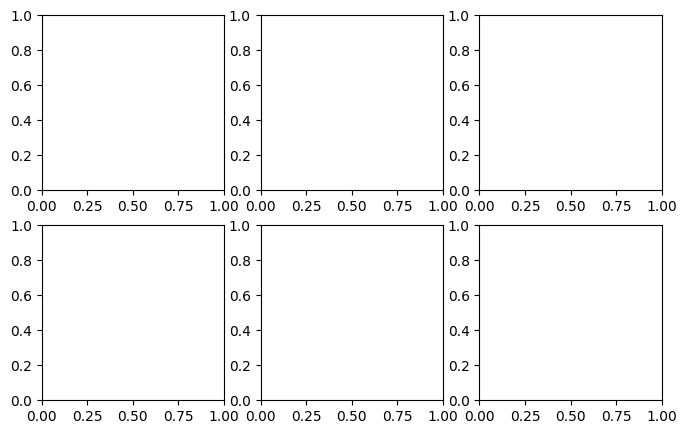

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.show()

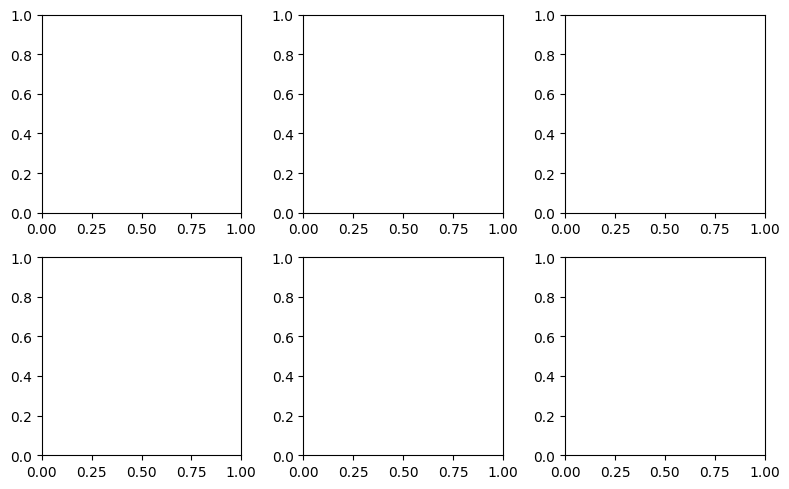

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout() # Agregamos esta línea que ajusta los números en los ejes.
plt.show()

Llenemos las gráficas con datos inventados.

Las listas `eje_horizontal` definen los datos que van en el eje horizontal de cada una de las seis gráficas. 

Las listas `eje_vertical` definen los datos que van en el eje vertical de cada una de las seis gráficas. 

Las líneas `22` a `34` generan las gráficas en las posiciones entre los corchetes. Por ejemplo la línea `22` crea a la gráfica en la posición `0, 1`, que es la izquierda superior izquierda, pues los índices se cuentan de `0` a `1` (horizontales) y de `0` a `2` (verticales).

Los índices dependen de lo que hayamos especificado en la línea `1`. Aquí especificamos que queríamos 2 columnas con gráficas, y 3 filas con gráficas.

Si esto no queda muy claro, sugiero modificar las posiciones de los corchetes y ver cómo cambian las gráficas. También pueden modificar la primera línea para generar un número distinto de gráficas.

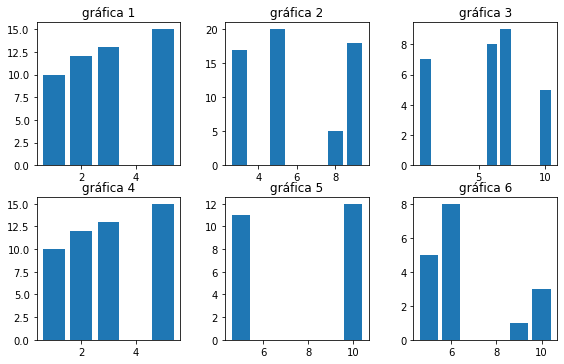

In [81]:
fig, ejes = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout() # Agregamos esta línea que ajusta los números en los ejes.

eje_horizontal1 = [1,2,3,5]
eje_vertical1 = [10,12,13,15]

eje_horizontal2 = [5,9,8,3]
eje_vertical2 = [20,18,5,17]

eje_horizontal3 = [10,7,6,1]
eje_vertical3 = [5,9,8,7]

eje_horizontal4 = [1,2,3,5]
eje_vertical4 = [10,12,13,15]

eje_horizontal5 = [10,5,10,5]
eje_vertical5 = [12,11,5,3]

eje_horizontal6 = [9,10,6,5]
eje_vertical6 = [1,3,8,5]

ejes[0][0].bar(eje_horizontal1, eje_vertical1)
ejes[0][0].set_title('gráfica 1')
ejes[0][1].bar(eje_horizontal2, eje_vertical2)
ejes[0][1].set_title('gráfica 2')
ejes[0][2].bar(eje_horizontal3, eje_vertical3)
ejes[0][2].set_title('gráfica 3')

ejes[1][0].bar(eje_horizontal4, eje_vertical4)
ejes[1][0].set_title('gráfica 4')
ejes[1][1].bar(eje_horizontal5, eje_vertical5)
ejes[1][1].set_title('gráfica 5')
ejes[1][2].bar(eje_horizontal6, eje_vertical6)
ejes[1][2].set_title('gráfica 6')

plt.show()

Volvamos al conjunto de datos de detección de sexismo. 

Como ya lo procesamos por el modelo de spaCy, podemos tomar esos datos para generar gráficas a partir de elllos.

Primero generemos una imagen con los tokens de verbos más comunes.

In [82]:
# Recordemos que Counter nos permite saber cuentas de una lista de manera sencilla.
from collections import Counter
contador  = Counter(tokens_verbos)
contador.most_common(10) # Especificamos los 10 tokens más comunes en la lista tokens_verbos.

[('tener', 4),
 ('quieren', 4),
 ('tengo', 3),
 ('parece', 3),
 ('hacer', 3),
 ('Tengo', 3),
 ('da', 3),
 ('hace', 3),
 ('tratar', 2),
 ('quiere', 2)]

In [86]:
# Manualmente creamos dos listas para el gráfico. Una para el eje horizontal, 
# y otra para el eje vertical. En este caso graficaremos palabras vs. frecuencia.
verbos_comunes = ['tener', 'quieren', 'tengo', 'parece', 'hacer']
frecuencia_verbos = [4, 4, 3, 3, 3]

Finalmente creamos una gráfica de los cinco tokens de verbos más comunes en el conjunto de datos de detección de sexismo, y cuántas veces aparecen dichos tokens (frecuencia).

El parámetro `color` dentro de la función `bar` permite especificar el color de las barras. 

El parámetro `width` dentro de la función `bar` permite especificar el ancho de las barras. 

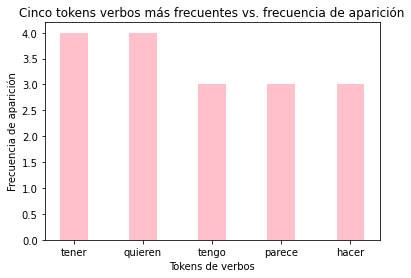

In [97]:
plt.bar(verbos_comunes, frecuencia_verbos, color='pink', width=0.4)
plt.xlabel("Tokens de verbos")
plt.ylabel("Frecuencia de aparición")
plt.title("Cinco tokens verbos más frecuentes vs. frecuencia de aparición")

plt.show()

### Gráficas de pie

Ahora generaremos una gráfica de pie con los mismos datos que la gráfica anterior. Para esto, sólo debemos usar la función `pie` en lugar de `bar`.

La función `pie` toma la una lista con el tamaño de cada partición del pie (en este caso el tamaño es la frecuencia de aparición de cada token verbo), y otra lista en `labels=`, la cual indica el nombre de cada partición.

Se puede especificar el parámetro `colors=` al que se le debe poner una lista con los colores de cada partición. En este caso, defino la lista `colores`, y a cada elemento de esa lista le pongo un string que corresponde a un color. Observen que también se pueden especificar colores por medio de su [código hexadecimal.](https://www.w3schools.com/colors/colors_hexadecimal.asp) 

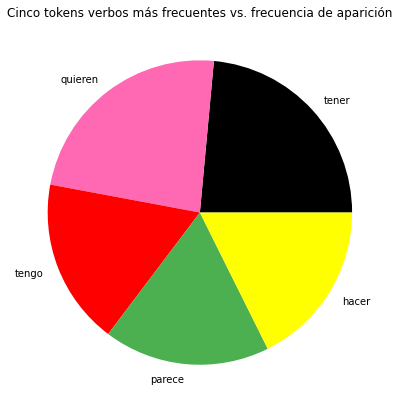

In [109]:
plt.figure(figsize=(7,7)) # Especificamos un largo y ancho de 7.

colores = ["black", "hotpink", "red", "#4CAF50", 'yellow']

plt.pie(frecuencia_verbos, labels=verbos_comunes, colors=colores);
plt.title("Cinco tokens verbos más frecuentes vs. frecuencia de aparición")
plt.show()

Ahora definamos una función que genera una gráfica de barras o una gráfica de pie. Sus parámetros son:

- `tipo_grafica`: sólo pueden ser `barras` o `pie`.
- `datos_coutner`: toma una variable con el resultado de un `Counter`.
- `ancho`: ancho de la figura a generar.
- `largo`: largo de la figura a generar.
- `titulo`: título de la imagen a generar.

In [153]:
def grafica(tipo_grafica, datos_counter, ancho, largo, titulo, color_barras, \
            colores_pie, eje_horiz_barra, eje_vert_barra):
  plt.figure(figsize=(int(largo),int(ancho)))
  eje_horizontal = []
  eje_vertical = []
  for conteo in datos_counter:
    for termino in conteo:
      if type(termino) == str:
        eje_horizontal.append(termino)
      elif type(termino) == int:
        eje_vertical.append(termino)
  if tipo_grafica == 'barra':
    plt.bar(eje_horizontal, eje_vertical, color=str(color_barras))
    plt.xlabel(str(eje_horiz_barra))
    plt.ylabel(str(eje_vert_barra))
    plt.title(str(titulo))
  elif tipo_grafica == 'pie':
    plt.pie(eje_vertical, labels=eje_horizontal, colors=colores)
    plt.title(str(titulo))
  else:
    raise AttributeError("Este tipo de gráfica no se puede generar con esta función.")  
  return

In [126]:
contador  = Counter(tokens_verbos)
cont = contador.most_common(5)

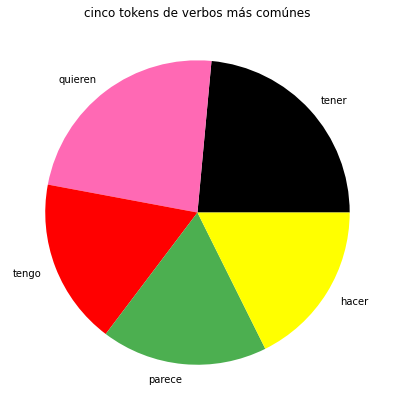

In [147]:
tipo_grafica = 'pie'
datos_counter = cont
ancho = 7
largo = 7
titulo = 'cinco tokens de verbos más comúnes'
colores_barras = '' # vacío, pues no haremos una gráfica de barras.
colores_pie = ["black", "hotpink", "red", "#4CAF50", 'yellow']
eje_horiz_barra = '' # vacío, pues no haremos una gráfica de barras.
eje_vert_barra = '' # vacío, pues no haremos una gráfica de barras.
grafica(tipo_grafica, datos_counter, ancho, largo, titulo, colores_barras,
        colores_pie, eje_horiz_barra, eje_vert_barra)

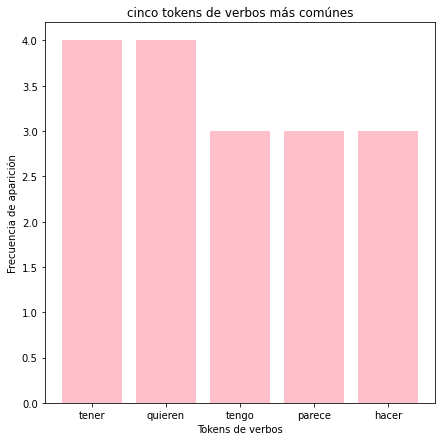

In [154]:
tipo_grafica = 'barra'
datos_counter = cont
ancho = 7
largo = 7
titulo = 'cinco tokens de verbos más comúnes'
colores_barras = 'pink'
colores_pie = '' # vacío, pues no haremos una gráfica de pie
eje_horiz_barra = "Tokens de verbos"
eje_vert_barra = "Frecuencia de aparición"
grafica(tipo_grafica, datos_counter, ancho, largo, titulo, colores_barras, colores_pie, eje_horiz_barra, eje_vert_barra)

Finalmente grafiquemos en una misma imagen los cinco:
- tokens sustantivos
- tokens adjetivos
- tokens verbos
- tokens auxiliares
- tokens determinantes
- tokens pronombres más frecuentes

Recordemos que todos estos tokens ya los obtuvimos al principio de la notebook, y los guardamos en variables con nombres alusivos a dichos tokens. 

In [ ]:
tokens_sustantivos = obtiene_pos(datos_nuevos, 'text', 'NOUN')
tokens_adjetivos = obtiene_pos(datos_nuevos, 'text', 'ADJ')
tokens_verbos = obtiene_pos(datos_nuevos, 'text', 'VERB')
tokens_aux = obtiene_pos(datos_nuevos, 'text', 'AUX')
tokens_det = obtiene_pos(datos_nuevos, 'text', 'DET')
tokens_pron

In [157]:
def funcion_auxiliar(lista_tokens, numero_tokens):
  from collections import Counter
  contador = Counter(lista_tokens)
  cont = contador.most_common(int(numero_tokens))
  eje_horizontal = []
  eje_vertical = []
  for conteo in cont:
    for termino in conteo:
      if type(termino) == str:
        eje_horizontal.append(termino)
      elif type(termino) == int:
        eje_vertical.append(termino)
  return eje_horizontal, eje_vertical

In [159]:
eje_horizontal1, eje_vertical1 = funcion_auxiliar(tokens_sustantivos, 5)
eje_horizontal2, eje_vertical2 = funcion_auxiliar(tokens_adjetivos, 5)
eje_horizontal3, eje_vertical3 = funcion_auxiliar(tokens_verbos, 5)
eje_horizontal4, eje_vertical4 = funcion_auxiliar(tokens_aux, 5)
eje_horizontal5, eje_vertical5 = funcion_auxiliar(tokens_det, 5)
eje_horizontal6, eje_vertical6 = funcion_auxiliar(tokens_pron, 5)

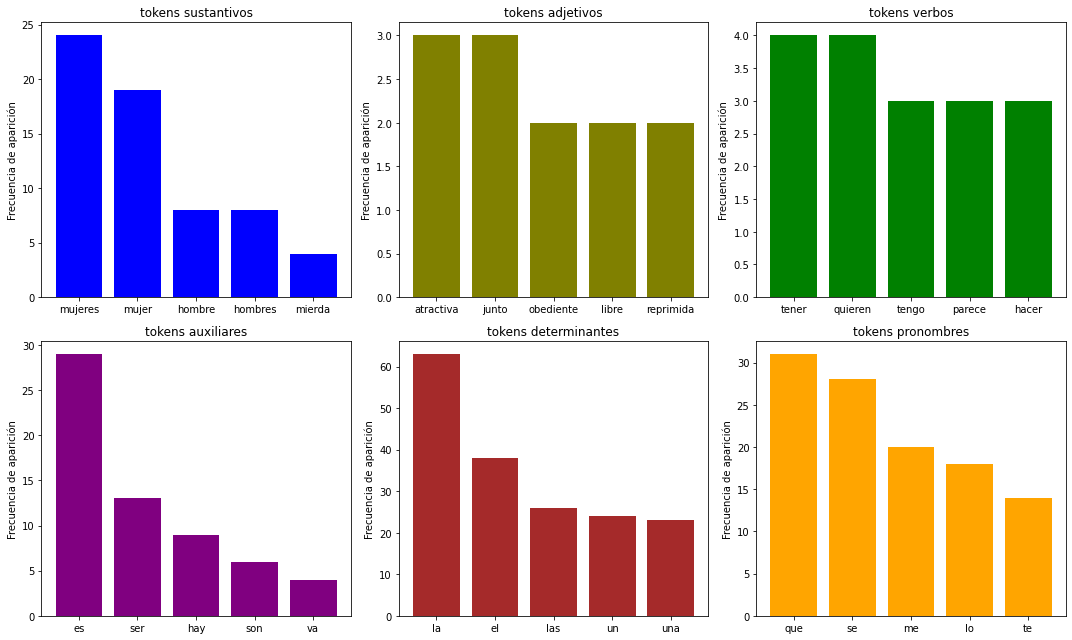

In [193]:
fig, ejes = plt.subplots(2, 3, figsize=(15, 9))

# Gráfica 1
ejes[0][0].bar(eje_horizontal1, eje_vertical1, color='blue')
ejes[0][0].set_ylabel("Frecuencia de aparición")
ejes[0][0].set_title('tokens sustantivos')

# Gráfica 2
ejes[0][1].bar(eje_horizontal2, eje_vertical2, color='olive')
ejes[0][1].set_ylabel("Frecuencia de aparición")
ejes[0][1].set_title('tokens adjetivos')

# Gráfica 3
ejes[0][2].bar(eje_horizontal3, eje_vertical3, color='green')
ejes[0][2].set_ylabel("Frecuencia de aparición")
ejes[0][2].set_title('tokens verbos')

# Gráfica 4
ejes[1][0].bar(eje_horizontal4, eje_vertical4, color='purple')
ejes[1][0].set_ylabel("Frecuencia de aparición")
ejes[1][0].set_title('tokens auxiliares')

# Gráfica 5
ejes[1][1].bar(eje_horizontal5, eje_vertical5, color='brown')
ejes[1][1].set_ylabel("Frecuencia de aparición")
ejes[1][1].set_title('tokens determinantes')

# Gráfica 6
ejes[1][2].bar(eje_horizontal6, eje_vertical6, color='orange')
ejes[1][2].set_ylabel("Frecuencia de aparición")
ejes[1][2].set_title('tokens pronombres')

plt.tight_layout() # Agregamos esta línea que ajusta los números en los ejes.
plt.show()